In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"
tmp = pd.read_html(
    "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8",
    attrs={
        "style": "text-align: right",
        "class": "wikitable collapsible collapsed",
    },
    decimal=",",
    thousands=".",
    na_values=["—"],
    encoding="utf-8",
)
table_soup = tmp[2]

In [2]:
# Вивести перші рядки таблиці за допомогою методу head
print(table_soup.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN


In [3]:
# Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
data = pd.DataFrame(table_soup)
print(data)
print(data.shape)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [4]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes
print(data.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [5]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
data1 = data.isnull()
print((data1.sum() / data.shape[0]).round(3))

Регіон    0.000
1950      0.071
1960      0.036
1970      0.036
1990      0.000
2000      0.000
2012      0.000
2014      0.071
2019      0.143
dtype: float64


In [6]:
# Видаліть з таблиці дані по всій країні, останній рядок таблиці
data1 = data.drop(
    labels=[27],
    axis=0,
)
print(data1)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [7]:
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
val = data.mean(numeric_only=True).round(1)
data = data.fillna(val)
print(data)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.1   8.0
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   8.0
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   8.0
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [8]:
# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
data_new = data.sort_values(
    by="2019",
    ascending=False,
)
data_new = data_new[:5]
print(data_new["Регіон"])

25            Київ
16      Рівненська
6     Закарпатська
2        Волинська
23     Чернівецька
Name: Регіон, dtype: object


In [9]:
# У якому регіоні була найвища народжуваність у 2014 році?
a = data[data["2014"] == data["2014"].max()]
print(a["Регіон"])

16    Рівненська
Name: Регіон, dtype: object


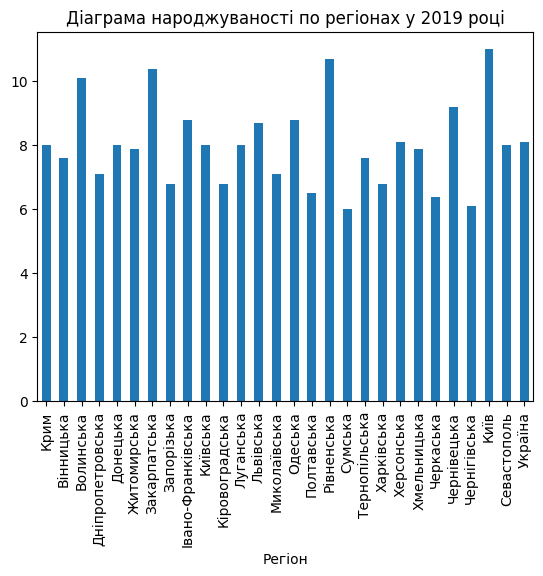

In [10]:
# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
regions = pd.Series(data["2019"].values, index=data["Регіон"])
regions.plot(kind="bar")
plt.title("Діаграма народжуваності по регіонах у 2019 році", fontsize=12)
plt.show()

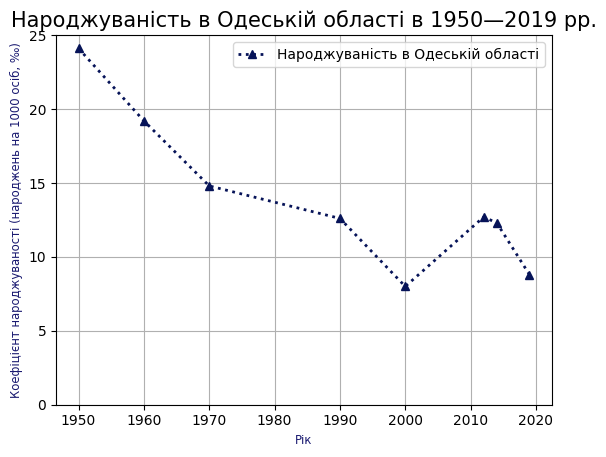

In [11]:
# Побудуйте стовпчикову графік народжуваності Одеській області в 1950—2019 рр.
data_odesa = data[data["Регіон"] == "Одеська"].iloc[0]
data_odesa = data_odesa[1:].values
plt.plot(    
    [1950, 1960, 1970, 1990, 2000, 2012, 2014, 2019],
    data_odesa,    
    label="Народжуваність в Одеській області",
    linestyle=":",
    color="#061358",
    linewidth=2,
    marker="^",
)
plt.ylim(0, 25)
plt.xlabel("Рік", fontsize="small", color="midnightblue")
plt.ylabel("Коефіцієнт народжуваності (народжень на 1000 осіб, ‰)", fontsize="small", color="midnightblue")
plt.title("Народжуваність в Одеській області в 1950—2019 рр.", fontsize=15)
plt.legend()
plt.grid()
plt.show()

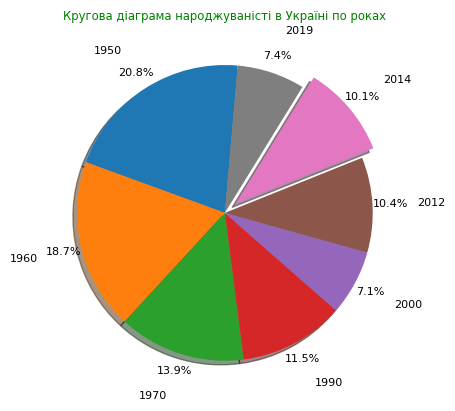

In [12]:
# Кругова діаграма народжуваністі в Україні по роках

data_new = data.loc[27]
data_new = data_new[1:]
explode = [0, 0, 0, 0, 0, 0, 0.1, 0]
fig, ax = plt.subplots()
ax.pie(
    data_new,
    explode=explode,
    shadow=True,
    labels=data_new.index,
    autopct="%1.1f%%",
    startangle=85,
    pctdistance=1.12,
    labeldistance=1.3,
    textprops={"size": "8"},
    radius=1,
)
plt.title(
    "Кругова діаграма народжуваністі в Україні по роках",
    fontsize="small",
    color="green",
)
plt.show()